# Candidacy Exam Paper
## Cameron Bale
***
#### Code for pre-processing the location data for South Korean COVID-19 patients.
***

In [1]:
from pyproj import Proj
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

First, we create a coordinate reference system for locations in Korea measured in meters.

In [2]:
p = Proj("epsg:5179")

In [3]:
from pyproj import CRS, Transformer
crs = CRS.from_epsg(5179)

In [4]:
crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
crs.geodetic_crs

<Geographic 2D CRS: EPSG:4737>
Name: Korea 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
proj = Transformer.from_crs(crs.geodetic_crs, crs)

In [7]:
proj.transform(37.615246, 126.715632)

(1957601.3596483178, 930775.7919304157)

In [8]:
proj_inv = Transformer.from_crs(crs, crs.geodetic_crs)

In [9]:
proj_inv.transform(1957601.3596483178, 930775.7919304157)

(37.615246, 126.71563200000001)

In [10]:
p.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now, we import the data. `PatientRoute.csv` contains patient ID and various corresponding latitude and longitude measurements. `PatientInfo.csv` contains some patient information such as their year of birth (can be used to infer age), gender, and whether the person was deceased.

In [11]:
routes = pd.read_csv("../Data/PatientRoute.csv")
info = pd.read_csv("../Data/PatientInfoUpdated.csv")

In [12]:
routes

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,1/22/2020,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,1/24/2020,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,1/25/2020,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,1/26/2020,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,1/26/2020,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
8087,6100000090,NaN,3/24/2020,Seoul,Gangseo-gu,airport,37.558655,126.794474
8088,6100000090,NaN,3/24/2020,Busan,Gangseo-gu,airport,35.173220,128.946459
8089,6100000090,NaN,3/25/2020,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
8090,6100000090,NaN,3/25/2020,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [13]:
routes.isnull().sum()

patient_id       0
global_num    3264
date             0
province         0
city             0
type             0
latitude         0
longitude        0
dtype: int64

In [14]:
routes.type.unique()

array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'academy', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'park', 'lodging', 'university', 'administrative_area_level_1'],
      dtype=object)

In [15]:
routes.groupby('type').size()

type
academy                          24
administrative_area_level_1      14
airport                         286
bakery                           29
bank                             34
bar                              29
beauty_salon                     21
cafe                            132
church                          157
etc                            2341
gas_station                      14
gym                              25
hospital                       2410
karaoke                          11
lodging                          46
park                             10
pc_cafe                          94
pharmacy                        257
post_office                      18
public_transportation           661
real_estate_agency               19
restaurant                      629
school                           73
store                           744
university                       14
dtype: int64

In [16]:
trajectory_sizes = routes.groupby('patient_id').size()

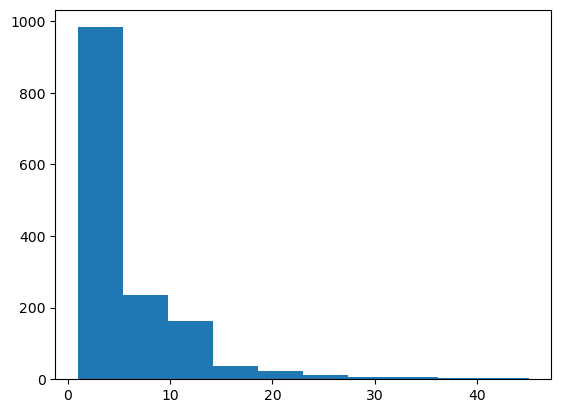

In [17]:
plt.hist(trajectory_sizes)
plt.show()

In [18]:
info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [19]:
info.isnull().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

***

Merging the data sets.

In [20]:
X = pd.merge(routes, info, how = "left", on = "patient_id")

In [21]:
X.isnull().sum()

patient_id               0
global_num            3264
date                     0
province_x               0
city_x                   0
type                     0
latitude                 0
longitude                0
sex                   1319
age                   1319
country                  0
province_y               0
city_y                 144
infection_case         337
infected_by           6203
contact_number        5677
symptom_onset_date    6500
confirmed_date           0
released_date         5493
deceased_date         8075
state                    0
dtype: int64

In [22]:
X

,patient_id,global_num,date,province_x,city_x,type,latitude,longitude,sex,age,...,province_y,city_y,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,1/22/2020,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632,male,50s,...,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000001,2.0,1/24/2020,Seoul,Jung-gu,hospital,37.567241,127.005659,male,50s,...,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
2,1000000002,5.0,1/25/2020,Seoul,Seongbuk-gu,etc,37.592560,127.017048,male,30s,...,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000002,5.0,1/26/2020,Seoul,Seongbuk-gu,store,37.591810,127.016822,male,30s,...,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
4,1000000002,5.0,1/26/2020,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534,male,30s,...,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,6100000090,NaN,3/24/2020,Seoul,Gangseo-gu,airport,37.558655,126.794474,male,40s,...,Gyeongsangnam-do,Yangsan-si,overseas inflow,NaN,NaN,2020-03-25,2020-03-26,NaN,NaN,released
8088,6100000090,NaN,3/24/2020,Busan,Gangseo-gu,airport,35.173220,128.946459,male,40s,...,Gyeongsangnam-do,Yangsan-si,overseas inflow,NaN,NaN,2020-03-25,2020-03-26,NaN,NaN,released
8089,6100000090,NaN,3/25/2020,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389,male,40s,...,Gyeongsangnam-do,Yangsan-si,overseas inflow,NaN,NaN,2020-03-25,2020-03-26,NaN,NaN,released
8090,6100000090,NaN,3/25/2020,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003,male,40s,...,Gyeongsangnam-do,Yangsan-si,overseas inflow,NaN,NaN,2020-03-25,2020-03-26,NaN,NaN,released


In [23]:
X.groupby('state').size()

state
deceased      55
isolated     646
released    7391
dtype: int64

In [24]:
X = X[["latitude", "longitude", "sex", "age", "state"]].dropna()

In [25]:
X.groupby('state').size()

state
deceased      55
isolated     483
released    6235
dtype: int64

In [26]:
X

,latitude,longitude,sex,age,state
0,37.615246,126.715632,male,50s,released
1,37.567241,127.005659,male,50s,released
2,37.592560,127.017048,male,30s,released
3,37.591810,127.016822,male,30s,released
4,37.563992,127.029534,male,30s,released
...,...,...,...,...,...
8087,37.558655,126.794474,male,40s,released
8088,35.173220,128.946459,male,40s,released
8089,35.336944,129.026389,male,40s,released
8090,35.335757,129.025003,male,40s,released


We convert the state variable to a binary variable.

In [27]:
new_state = (X["state"] == "deceased").astype(int)

In [28]:
X = X.assign(state=new_state).reset_index(drop=True)

In [29]:
X

,latitude,longitude,sex,age,state
0,37.615246,126.715632,male,50s,0
1,37.567241,127.005659,male,50s,0
2,37.592560,127.017048,male,30s,0
3,37.591810,127.016822,male,30s,0
4,37.563992,127.029534,male,30s,0
...,...,...,...,...,...
6768,37.558655,126.794474,male,40s,0
6769,35.173220,128.946459,male,40s,0
6770,35.336944,129.026389,male,40s,0
6771,35.335757,129.025003,male,40s,0


We can check the minimum and maximum `latitude` and `longitude` values; and they fall within the boundaries of the coordinate reference system defined above.

In [30]:
X.describe()

,latitude,longitude,state
count,6773.000000,6773.000000,6773.000000
mean,36.760741,127.627249,0.008120
std,0.913153,0.898383,0.089754
min,33.454642,126.301005,0.000000
25%,35.920430,126.938325,0.000000
50%,37.340286,127.108081,0.000000
75%,37.514543,128.500770,0.000000
max,38.193169,129.475746,1.000000


We perform the projection from latitude and longitude to meters for the patient locations.

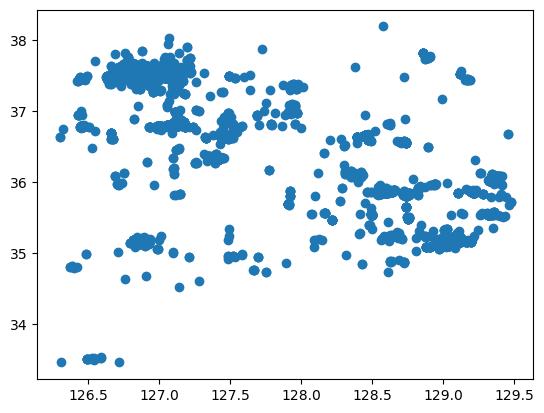

In [31]:
plt.scatter(X["longitude"], X["latitude"])

In [32]:
lons, lats = p(X["longitude"], X["latitude"])

In [33]:
new_locs = pd.DataFrame([lats, lons]).T

In [34]:
new_locs

,0,1
0,1.957601e+06,9.307758e+05
1,1.952101e+06,9.563442e+05
2,1.954905e+06,9.573645e+05
3,1.954822e+06,9.573441e+05
4,1.951730e+06,9.584509e+05
...,...,...
6768,1.951268e+06,9.376869e+05
6769,1.687396e+06,1.131718e+06
6770,1.705664e+06,1.138718e+06
6771,1.705530e+06,1.138594e+06


In [35]:
new_locs.columns = ["latitude", "longitude"]

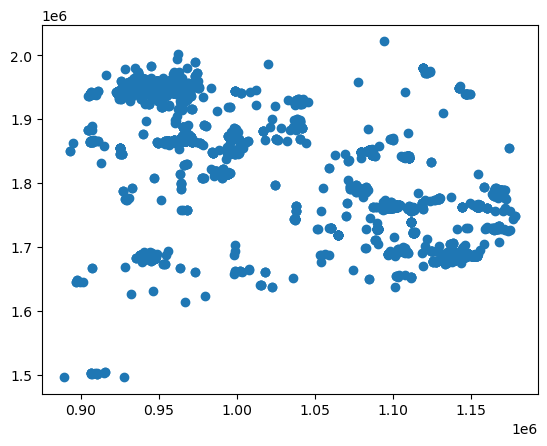

In [36]:
plt.scatter(new_locs["longitude"], new_locs["latitude"])
plt.show()

We will standardize the location measurements. Overall, we will treat `latitude`, `longitude`, as continuous, and `state`, `age`, and `date` as categorical.

In [37]:
# standardize location measurements
means = np.mean(new_locs[["latitude", "longitude"]], axis = 0)
stds = np.std(new_locs[["latitude", "longitude"]], axis = 0)
new_locs[["latitude", "longitude"]] = (new_locs[["latitude", "longitude"]]-means)/stds

standardization_stats = pd.DataFrame({"means":means, "stds":stds})

In [38]:
means

latitude     1.862904e+06
longitude    1.012072e+06
dtype: float64

In [39]:
stds

latitude     100990.921761
longitude     80816.765932
dtype: float64

In [40]:
standardization_stats

,means,stds
latitude,1.862904e+06,100990.921761
longitude,1.012072e+06,80816.765932


In [41]:
X = X.assign(longitude=new_locs.longitude, latitude=new_locs.latitude)

In [42]:
X

,latitude,longitude,sex,age,state
0,0.937678,-1.005937,male,50s,0
1,0.883214,-0.689563,male,50s,0
2,0.910977,-0.676938,male,30s,0
3,0.910154,-0.677191,male,30s,0
4,0.879538,-0.663495,male,30s,0
...,...,...,...,...,...
6768,0.874960,-0.920422,male,40s,0
6769,-1.737867,1.480452,male,40s,0
6770,-1.556978,1.567066,male,40s,0
6771,-1.558301,1.565532,male,40s,0


In [43]:
cat_columns = X.select_dtypes(['object']).columns

In [44]:
cat_columns

Index(['sex', 'age'], dtype='object')

In [45]:
X[cat_columns] = X[cat_columns].apply(lambda x: x.astype('category'))

In [46]:
categories = X[cat_columns].apply(lambda x: x.cat.categories)

In [47]:
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [48]:
categories

sex            Index(['female', 'male'], dtype='object')
age    Index(['0s', '10s', '20s', '30s', '40s', '50s'...
dtype: object

In [49]:
categories.age

Index(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'], dtype='object')

In [50]:
X

,latitude,longitude,sex,age,state
0,0.937678,-1.005937,1,5,0
1,0.883214,-0.689563,1,5,0
2,0.910977,-0.676938,1,3,0
3,0.910154,-0.677191,1,3,0
4,0.879538,-0.663495,1,3,0
...,...,...,...,...,...
6768,0.874960,-0.920422,1,4,0
6769,-1.737867,1.480452,1,4,0
6770,-1.556978,1.567066,1,4,0
6771,-1.558301,1.565532,1,4,0


In [51]:
X.to_csv("../Data/cleaned_data.csv", index = False)
standardization_stats.to_csv("../Data/standardization_stats.csv", index = False)

***

Number of locations.

In [52]:
N = X.shape[0]
N

6773

Number of locations from deceased individuals.

In [53]:
np.sum(X.state)

55

Number of unique days.

Convert `date` to a `date-time` variable.

In [54]:
# X['date'] = pd.to_datetime(X['date'])

Observations range from January 20th, 2020 to May 30th, 2020.

In [55]:
# X.sort_values('date')

How many locations are from males?

In [56]:
np.mean(X.sex == 'male')

0.0

Visualize age distribution.

In [57]:
age_cats, age_counts = np.unique(X.age, return_counts=True)

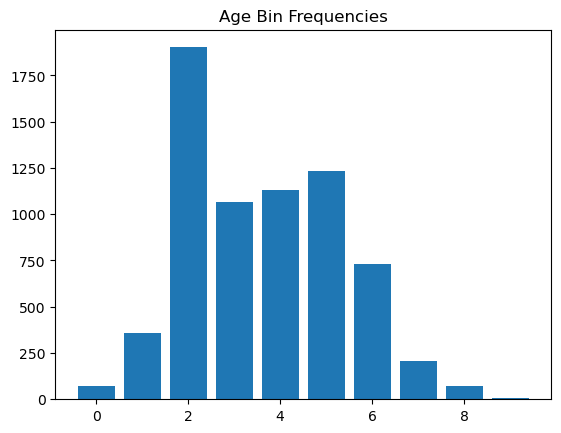

In [58]:
ax = plt.bar(age_cats, age_counts)
# ax.set_ylabel('Frequency', fontsize=12)
# ax.set_xlabel('Age Bins', fontsize=12)
# ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
# ax.set_xticklabels(labels=categories['age'])
plt.title("Age Bin Frequencies")
plt.show()

Visualize distribution of locations observed over time.

In [59]:
# day_cats, day_counts = np.unique(X.date, return_counts=True)

In [60]:
# ax = plt.bar(day_cats, day_counts)
# # ax.set_ylabel('Frequency', fontsize=12)
# # ax.set_xlabel('Age Bins', fontsize=12)
# # ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
# # ax.set_xticklabels(labels=categories['age'])
# plt.title("Number of Locations Observed Daily")
# plt.xticks(rotation = 40)
# plt.show()

Now we convert the categorical variables into numeric for the purposes of pMSE modeling. `Age` and `State` will still be treated as categorical for synthesis.

Convert to number of days since beginning date.

In [61]:
# basedate = pd.Timestamp('2020-01-20')

In [62]:
# X['date'] = (X['date'] - basedate).dt.days

Shuffle the rows of the data and then randomly sample half for training data, then half for holdout data 20 times.

We are sampling with replacement.

In [63]:
train_data = X.sample(frac=0.5, random_state=42, replace=True).reset_index(drop=True)

# generate a set of twenty holdout datasets
holdout_datasets = [X.sample(frac=0.5, replace=True).reset_index(drop=True) for i in range(20)]

In [64]:
train_data.to_csv("../Data/train_dataset.csv", index=False)

In [65]:
for i, H in enumerate(holdout_datasets):
    H.to_csv("../Data/holdout_dataset_" + str(i) + ".csv", index=False)